**Air Quality Index Prediction**

We have a dataset of 26 cities which contains the quantities of various gases present in the atmosphere in that city on that particular day.


In this project we anaylze that data and using various machine learning algorithms like Random forest, Decision Tree Regressor and Linear Regression predict the AQI score based on these gases.

**Importing the necessary modules and reading the dataset**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv(r'C:\Users\Sparsh Kumar\Desktop\fds proj\city_day.csv')

In [4]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,29-01-2015,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209,Poor
1,Ahmedabad,30-01-2015,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328,Very Poor
2,Ahmedabad,31-01-2015,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514,Severe
3,Ahmedabad,01-02-2015,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782,Severe
4,Ahmedabad,02-02-2015,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914,Severe


In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64

In [6]:
# print the number of rows and columns
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 24850
Number of columns: 16


**Feature Engineering**



In [7]:
# APPLY  backward and forward filling because data not replate itself.
df['PM2.5'].fillna(method = 'bfill',inplace = True )
df['PM10'].fillna(method = 'bfill',inplace = True )
df['NO'].fillna(method = 'ffill',inplace = True )
df['NO2'].fillna(method = 'ffill',inplace = True )
df['NOx'].fillna(method = 'ffill',inplace = True )
df['NH3'].fillna(method = 'bfill',inplace = True )
df['CO'].fillna(method = 'ffill',inplace = True )
df['SO2'].fillna(method = 'ffill',inplace = True )
df['O3'].fillna(method = 'ffill',inplace = True )
df['Benzene'].fillna(method = 'ffill',inplace = True )
df['Toluene'].fillna(method = 'ffill',inplace = True )
df['Xylene'].fillna(method = 'ffill',inplace = True )
df['AQI'].fillna(method = 'bfill',inplace = True )
df['AQI_Bucket'].fillna(method = 'bfill',inplace = True )

C:\Temp\ipykernel_35100\3568784637.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PM2.5'].fillna(method = 'bfill',inplace = True )
C:\Temp\ipykernel_35100\3568784637.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PM10'].fillna(method = 'bfill',inplace = True )
C:\Temp\ipykernel_35100\3568784637.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['NO'].fillna(method = 'ffill',inplace = True )
C:\Temp\ipykernel_35100\3568784637.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['NO2'].fillna(method = 'ffill',inplace = True )
C:\Temp\ipykernel_35100\3568784637.py:6: FutureWarning: Series.fillna with 'method' is dep

In [8]:
df["year"]=df['Date'].apply(lambda x:x.split("-")[0])
df["Month"]=df['Date'].apply(lambda x:x.split("-")[1])
df["date"]=df['Date'].apply(lambda x:x.split("-")[2])

In [9]:
df.drop('Date', axis = 1 , inplace = True)

**Exploratory Data Analysis**


In [10]:
df['PM2.5'].value_counts()

PM2.5
217.13    315
14.18      76
41.99      59
62.48      32
19.92      24
         ... 
115.16      1
146.37      1
133.35      1
116.33      1
24.38       1
Name: count, Length: 11542, dtype: int64

In [11]:
# TOP 10  city which higest PM 2.5
df.groupby(['City']).count()['PM2.5']

City
Ahmedabad             1334
Aizawl                 111
Amaravati              841
Amritsar              1126
Bengaluru             1910
Bhopal                 278
Brajrajnagar           713
Chandigarh             299
Chennai               1884
Coimbatore             344
Delhi                 1999
Ernakulam              153
Gurugram              1453
Guwahati               495
Hyderabad             1880
Jaipur                1094
Jorapokhar             771
Kochi                  158
Kolkata                754
Lucknow               1893
Mumbai                 775
Patna                 1459
Shillong               205
Talcher                698
Thiruvananthapuram    1052
Visakhapatnam         1171
Name: PM2.5, dtype: int64

In [12]:
print(df.isnull().sum())

City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
year          0
Month         0
date          0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24850 entries, 0 to 24849
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   PM2.5       24850 non-null  float64
 2   PM10        24850 non-null  float64
 3   NO          24850 non-null  float64
 4   NO2         24850 non-null  float64
 5   NOx         24850 non-null  float64
 6   NH3         24850 non-null  float64
 7   CO          24850 non-null  float64
 8   SO2         24850 non-null  float64
 9   O3          24850 non-null  float64
 10  Benzene     24850 non-null  float64
 11  Toluene     24850 non-null  float64
 12  Xylene      24850 non-null  float64
 13  AQI         24850 non-null  int64  
 14  AQI_Bucket  24850 non-null  object 
 15  year        24850 non-null  object 
 16  Month       24850 non-null  object 
 17  date        24850 non-null  object 
dtypes: float64(12), int64(1), object(5)
memory usage: 3.4+ MB


In [14]:
df['PM2.5'].value_counts().index
d = df['PM2.5'].value_counts().values
O = df['City'].value_counts().index

([<matplotlib.patches.Wedge at 0x1d5779a2810>,
 [Text(-0.08932417424959198, 1.0963672705323835, 'Delhi'),
  Text(-0.9312869802239936, -0.5854097372484294, 'Bengaluru'),
  Text(-0.3267237140418893, -1.0503578507740463, 'Lucknow'),
  Text(0.19227541531352135, -1.083065171015121, 'Chennai'),
  Text(0.49758955178486947, -0.9810222413149118, 'Hyderabad'),
  Text(0.7175681935247057, -0.833724107628951, 'Patna'),
  Text(0.8754615179802019, -0.6660083562056865, 'Gurugram'),
  Text(0.9849064091648853, -0.48985647406759036, 'Ahmedabad'),
  Text(1.0593442510795847, -0.2962933642602112, 'Visakhapatnam'),
  Text(1.095630628021992, -0.09794655144585414, 'Amritsar')],
 [Text(-0.0487222768634138, 0.5980185111994819, '52.59%'),
  Text(-0.5079747164858146, -0.31931440213550694, '12.69%'),
  Text(-0.1782129349319396, -0.5729224640585707, '9.85%'),
  Text(0.10487749926192072, -0.5907628205537022, '5.34%'),
  Text(0.27141248279174696, -0.5351030407172246, '4.01%'),
  Text(0.3914008328316576, -0.45475860416

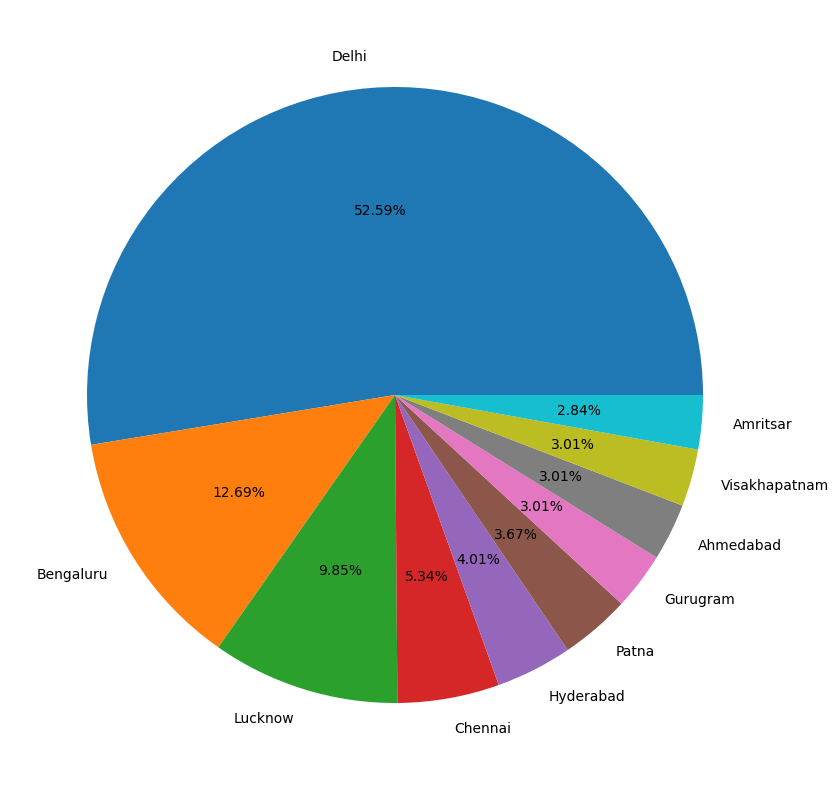

In [15]:
# TOP 10 CITY HAS MOST AMUONT OF PM2.5
plt.figure(figsize = (20,10))
plt.pie(d[:10], labels = O[:10],autopct='%1.2f%%')

<Axes: xlabel='City', ylabel='PM10'>

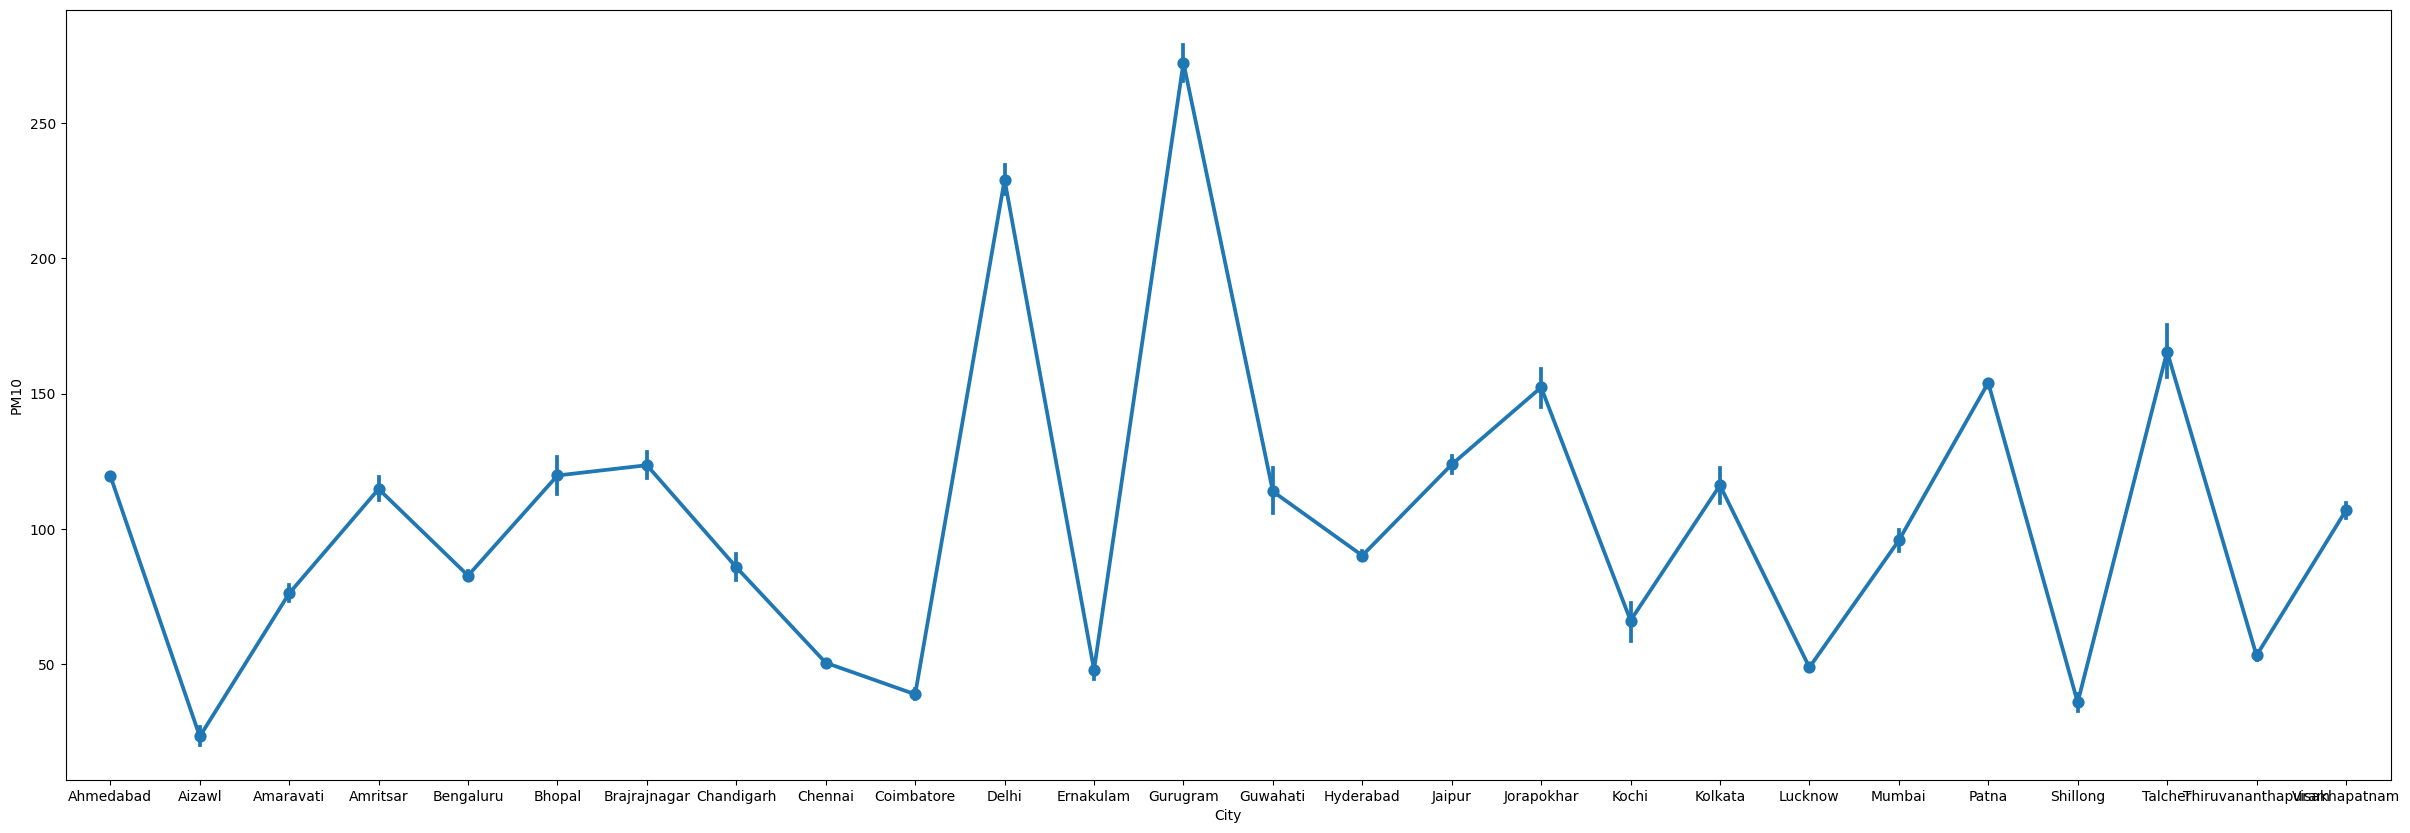

In [16]:
import seaborn as sns
plt.figure(figsize = (30,10))

sns.pointplot(x = 'City', y = 'PM10', data = df)

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'Xylene'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

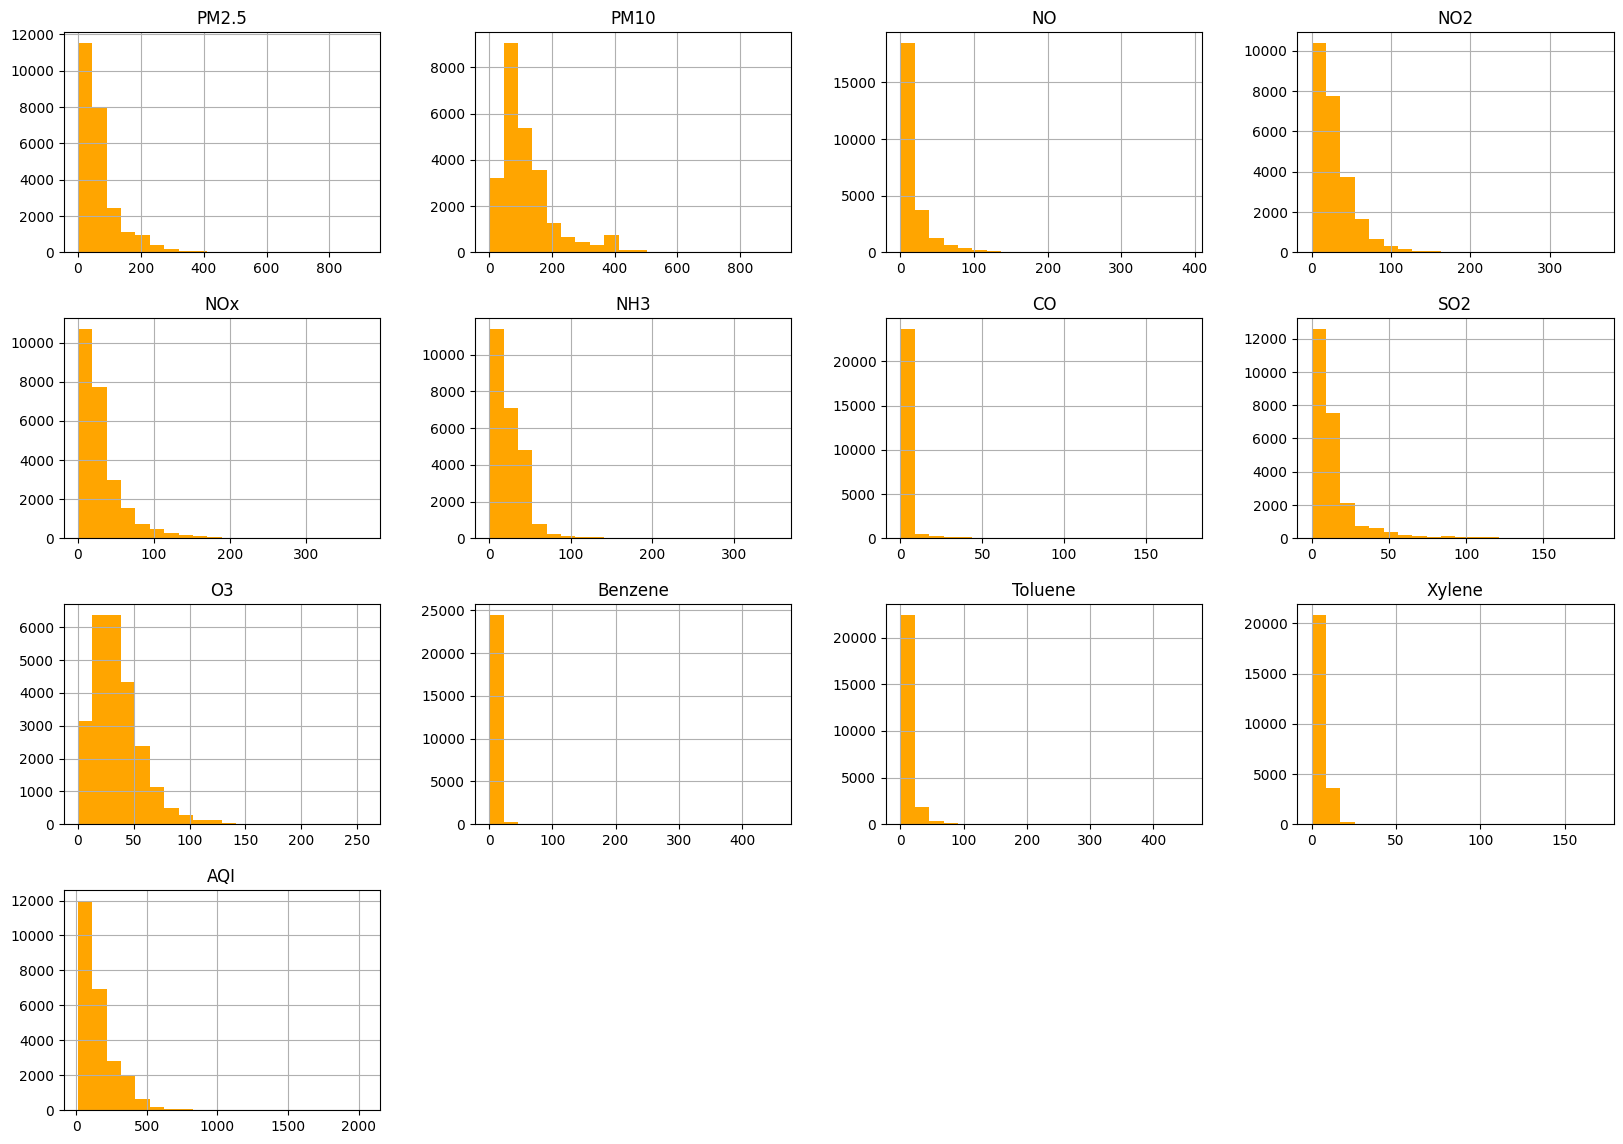

In [17]:
# Distribution of the data
df.hist(bins = 20, color = 'orange', figsize = (20, 14))

In [18]:
#  Maximum and minimum NO  of each city
g = df.groupby(['City']).NO.agg([min, max]).reset_index()
g

C:\Temp\ipykernel_35100\164475136.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'min' instead.
  g = df.groupby(['City']).NO.agg([min, max]).reset_index()
C:\Temp\ipykernel_35100\164475136.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  g = df.groupby(['City']).NO.agg([min, max]).reset_index()


,City,min,max
0,Ahmedabad,0.06,175.81
1,Aizawl,2.90,20.36
2,Amaravati,0.25,43.76
3,Amritsar,0.40,103.44
4,Bengaluru,0.46,95.19
5,Bhopal,0.59,30.94
6,Brajrajnagar,0.03,390.68
7,Chandigarh,0.44,70.94
8,Chennai,1.76,59.44
9,Coimbatore,0.19,87.90


<Axes: xlabel='City', ylabel='max'>

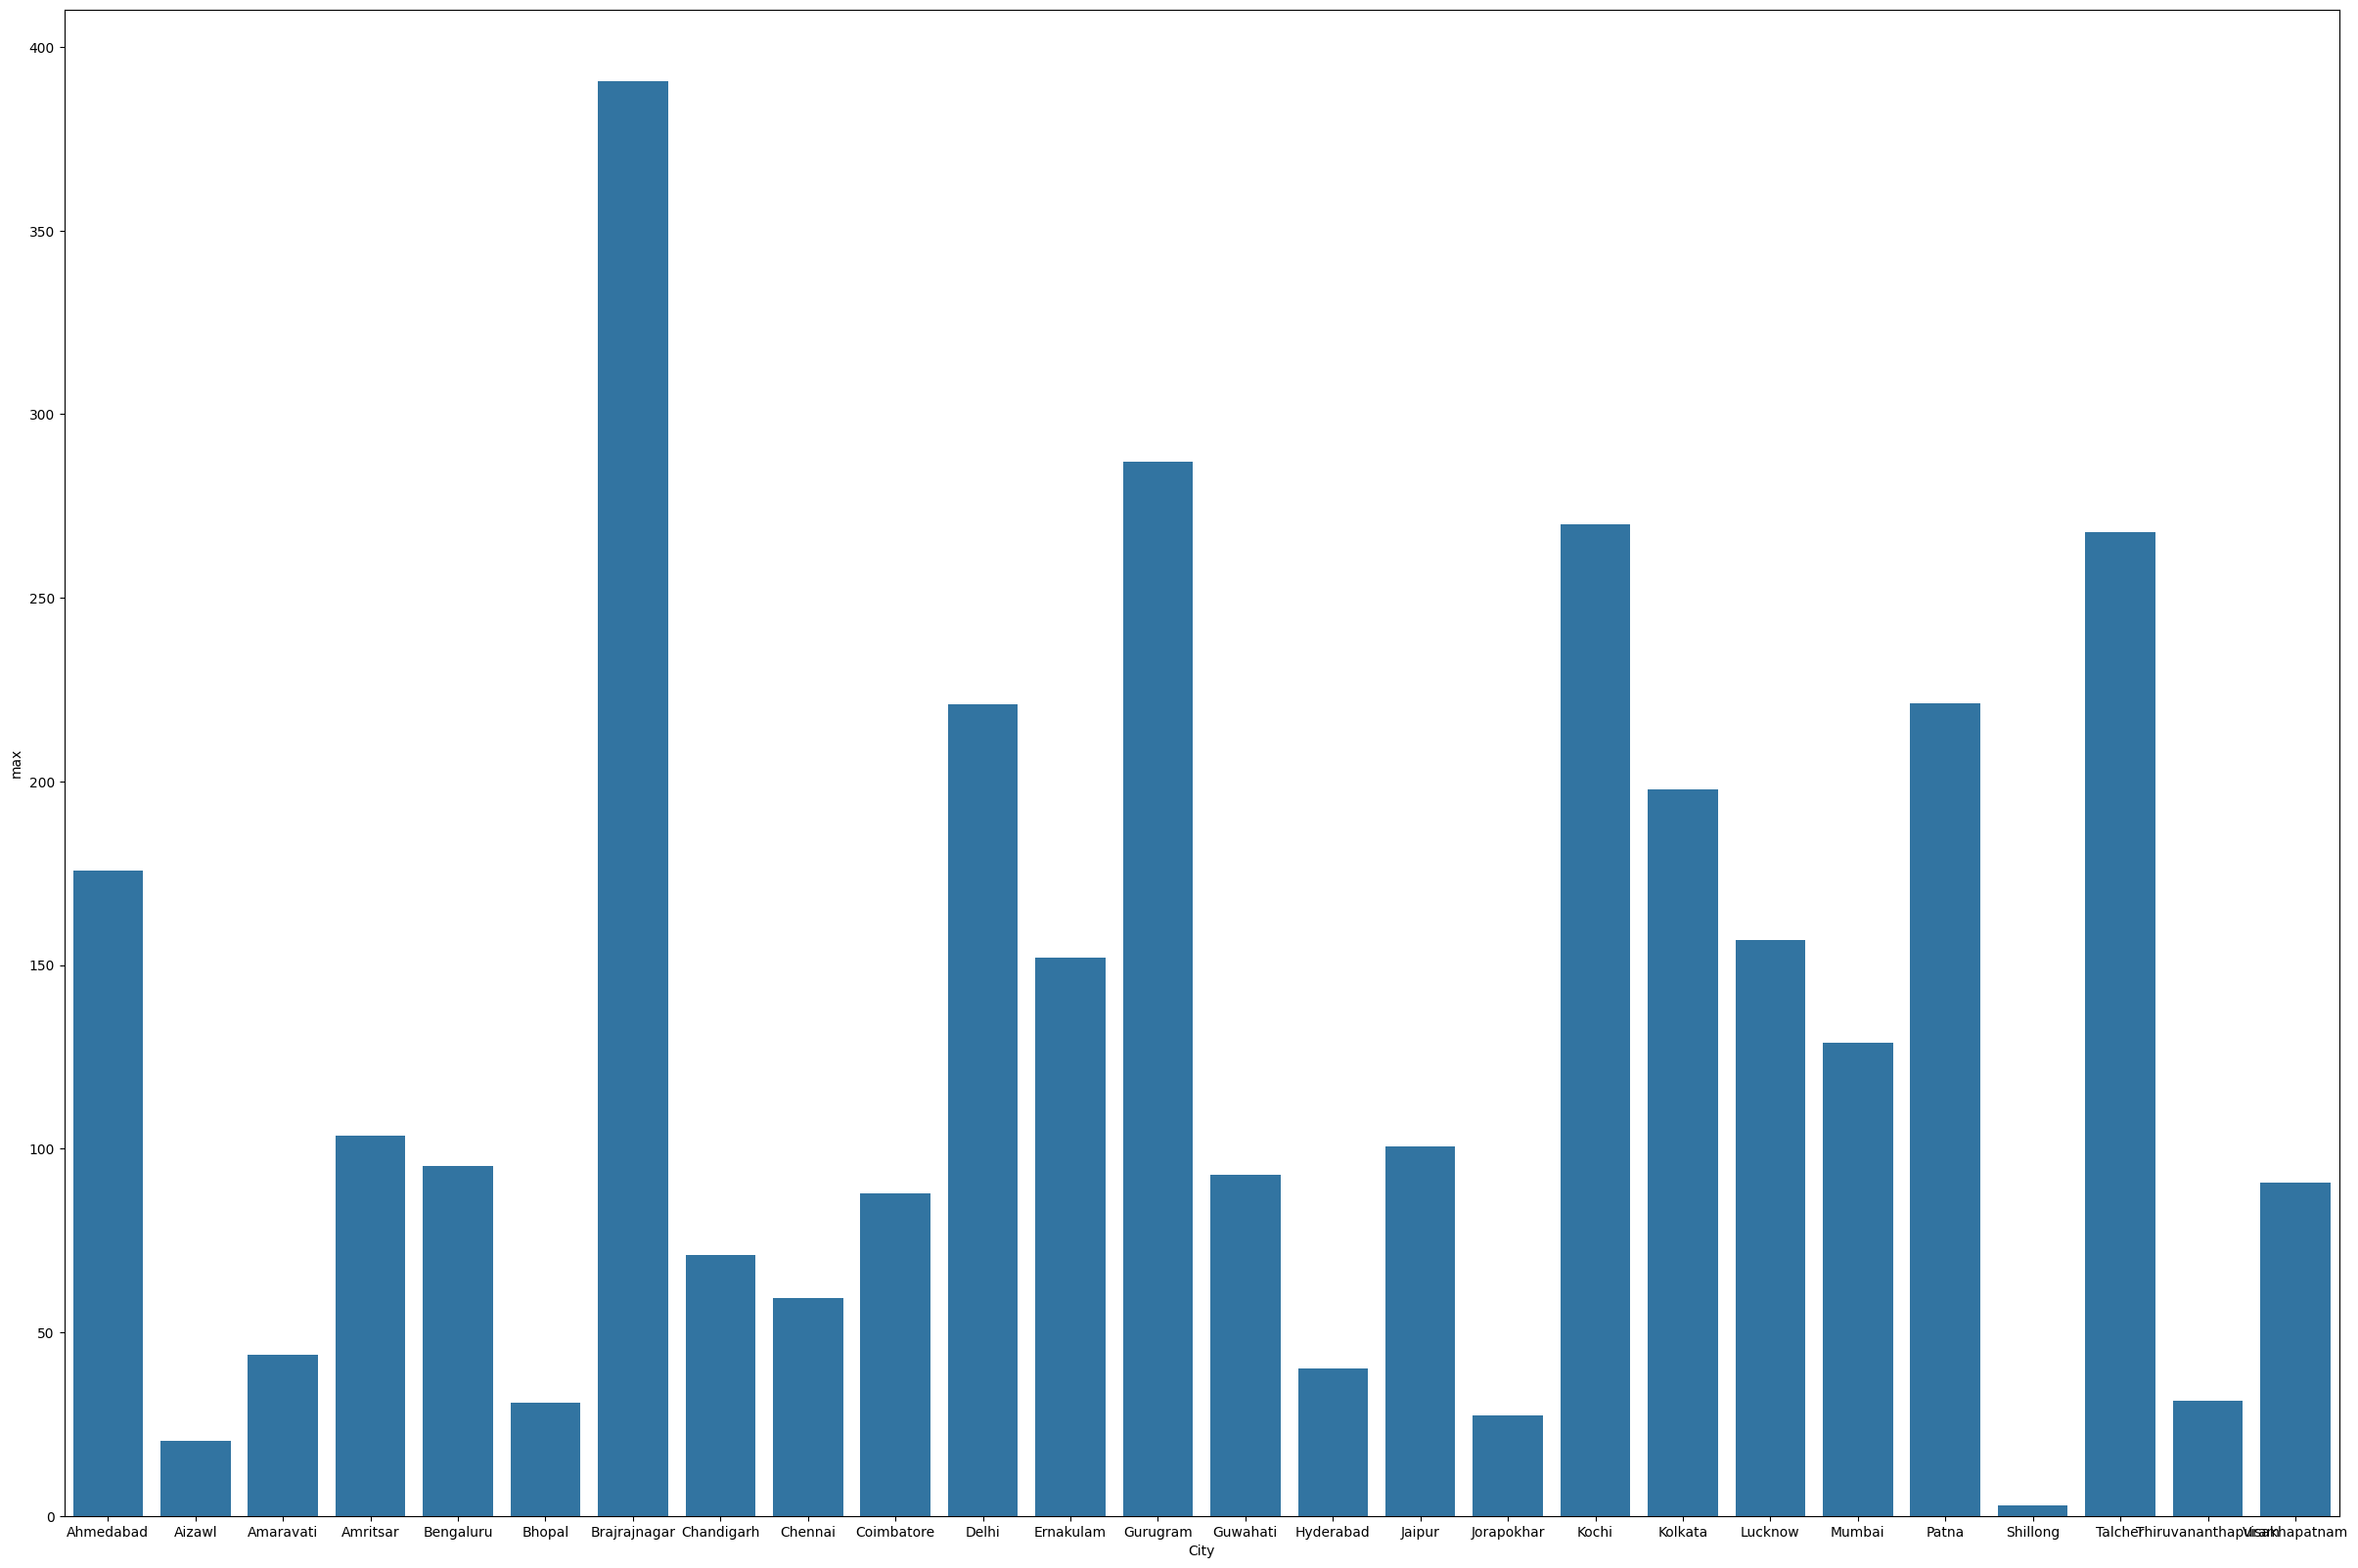

In [19]:
# maximum NO in city
plt.figure(figsize = (30,20))
sns.barplot(x = 'City' , y = 'max', data = g)

In [20]:
# Average NO yearwise
g = df.groupby(['year']).NO.agg(['mean']).reset_index()
g

,year,mean
0,01,18.948810
1,02,18.995487
2,03,18.560752
3,04,18.394614
4,05,18.302845
5,06,17.964634
6,07,17.434685
7,08,17.579135
8,09,17.247764
9,10,18.071037


In [21]:
# aveage AOI in every city
o  = df.groupby(['City']).AQI.agg(['mean']).reset_index()
o.head(10)

,City,mean
0,Ahmedabad,452.122939
1,Aizawl,34.765766
2,Amaravati,95.299643
3,Amritsar,119.920959
4,Bengaluru,94.318325
5,Bhopal,132.827338
6,Brajrajnagar,150.280505
7,Chandigarh,96.498328
8,Chennai,114.502654
9,Coimbatore,73.023256


In [22]:
# maximum AQI of every city on each year
v = df.groupby(['City', 'year']).AQI.agg([max]).reset_index()
v

C:\Temp\ipykernel_35100\3627557325.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  v = df.groupby(['City', 'year']).AQI.agg([max]).reset_index()


,City,year,max
0,Ahmedabad,01,1613
1,Ahmedabad,02,1246
2,Ahmedabad,03,1719
3,Ahmedabad,04,1264
4,Ahmedabad,05,1261
...,...,...,...
801,Visakhapatnam,27,290
802,Visakhapatnam,28,284
803,Visakhapatnam,29,220
804,Visakhapatnam,30,219


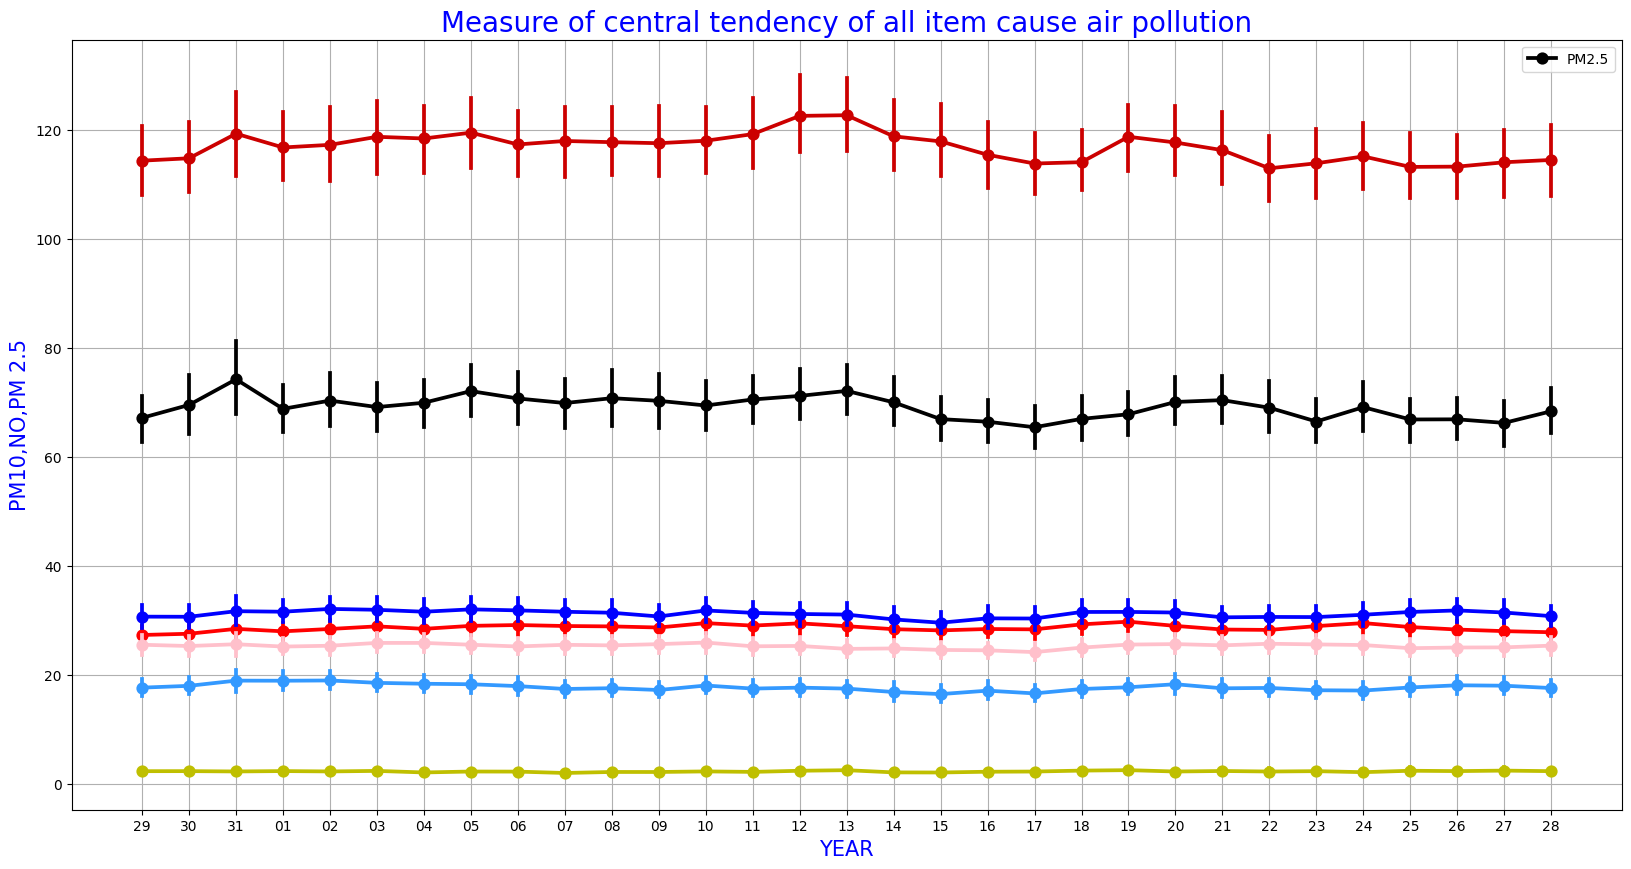

In [24]:
plt.subplots(figsize =(20,10))

sns.pointplot(x='year',y='PM2.5',data=df,color='black',label='PM2.5')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='PM10',data=df,color='#CC0000')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='NO',data=df,color='#3399FF')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='NO2',data=df,color='red')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='NOx',data=df,color='b')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='CO',data=df,color='y')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='NH3',data=df,color='pink')
plt.plot(alpha=0.8)

plt.xlabel('YEAR',fontsize = 15,color='blue')
plt.ylabel('PM10,NO,PM 2.5',fontsize = 15,color='blue')
plt.title('Measure of central tendency of all item cause air pollution',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [25]:
df.columns


Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'year', 'Month',
       'date'],
      dtype='object')

In [26]:
# Next, we can engineer some new features based on the existing ones
df['PM_ratio'] = df['PM2.5'] / df['PM10']
df['NOx_ratio'] = df['NOx'] / (df['NO'] + df['NO2'] + df['NOx'])
df['CO_SO2'] = df['CO'] * df['SO2']
df['Toluene_Xylene'] = df['Toluene'] + df['Xylene']

In [27]:
# Drop irrelevant columns
df.drop(['City', 'AQI_Bucket', 'date'], axis=1, inplace=True)


**Model Building**


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets
X = df.drop(['AQI'], axis=1)
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply StandardScaler to the training and testing sets
scaler =  MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)



from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Make predictions for training and testing sets
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Calculate RMSE, MAE, and MSE for training set
train_rmse_lr = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae_lr = mean_absolute_error(y_train, y_train_pred)
train_mse_lr = mean_squared_error(y_train, y_train_pred)
train_r2_lr = r2_score(y_train, y_train_pred)

# Calculate RMSE, MAE, and MSE for testing set
test_rmse_lr = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae_lr = mean_absolute_error(y_test, y_test_pred)
test_mse_lr = mean_squared_error(y_test, y_test_pred)
test_r2_lr = r2_score(y_test, y_test_pred)
# Print the scores
print('Training scores:')
print('RMSE:', train_rmse_lr)
print('MAE:', train_mae_lr)
print('MSE:', train_rmse_lr)
print('R2 Score:',train_r2_lr)

print('\nTesting scores:')
print('RMSE:', test_rmse_lr)
print('MAE:', test_mae_lr)
print('MSE:', test_mse_lr)
print('R2 Score:',test_r2_lr)

Training scores:
RMSE: 56.242381805524914
MAE: 32.014884549391226
MSE: 56.242381805524914
R2 Score: 0.843134110704769

Testing scores:
RMSE: 62.28460636227891
MAE: 33.26434173995017
MSE: 3879.372189704034
R2 Score: 0.7881400411544014


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
# Evaluate the model on both training and testing datasets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate RMSE, MAE, and MSE for training set
train_rmse_rf = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae_rf = mean_absolute_error(y_train, y_train_pred)
train_mse_rf = mean_squared_error(y_train, y_train_pred)
train_r2_rf = r2_score(y_train, y_train_pred)

# Calculate RMSE, MAE, and MSE for testing set
test_rmse_rf= mean_squared_error(y_test, y_test_pred, squared=False)
test_mae_rf= mean_absolute_error(y_test, y_test_pred)
test_mse_rf = mean_squared_error(y_test, y_test_pred)
test_r2_rf = r2_score(y_test, y_test_pred)
# Print the scores
print('Training scores:')
print('RMSE:', train_rmse_rf)
print('MAE:', train_mae_rf)
print('MSE:', train_mse_rf)
print('R2 Score:',train_r2_rf)

print('\nTesting scores:')
print('RMSE:', test_rmse_rf)
print('MAE:', test_mae_rf)
print('MSE:', test_mse_rf)
print('R2 Score:',test_r2_rf)


Training scores:
RMSE: 17.00127344576476
MAE: 7.882459255533198
MSE: 289.043298777666
R2 Score: 0.9856661118135884

Testing scores:
RMSE: 40.941759947584494
MAE: 20.908937625754525
MSE: 1676.2277076056337
R2 Score: 0.9084579886168965


In [31]:
from sklearn.tree import DecisionTreeRegressor

# Create the classifier
clf = DecisionTreeRegressor()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate RMSE, MAE, and MSE for training set
train_rmse_clf = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae_clf = mean_absolute_error(y_train, y_train_pred)
train_mse_clf = mean_squared_error(y_train, y_train_pred)
train_r2_clf = r2_score(y_train, y_train_pred)

# Calculate RMSE, MAE, and MSE for testing set
test_rmse_clf = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae_clf= mean_absolute_error(y_test, y_test_pred)
test_mse_clf = mean_squared_error(y_test, y_test_pred)
test_r2_clf = r2_score(y_test, y_test_pred)
# Print the scores
print('Training scores:')
print('RMSE:', train_rmse_clf)
print('MAE:', train_mae_clf)
print('MSE:', train_mse_clf)
print('R2 Score:',train_r2_clf)

print('\nTesting scores:')
print('RMSE:', test_rmse_clf)
print('MAE:', test_mae_clf)
print('MSE:', test_mse_clf)
print('R2 Score:',test_r2_clf)



Training scores:
RMSE: 0.0
MAE: 0.0
MSE: 0.0
R2 Score: 1.0

Testing scores:
RMSE: 59.90927412980868
MAE: 29.543259557344065
MSE: 3589.1211267605636
R2 Score: 0.8039912086225031


**Model Comparison**


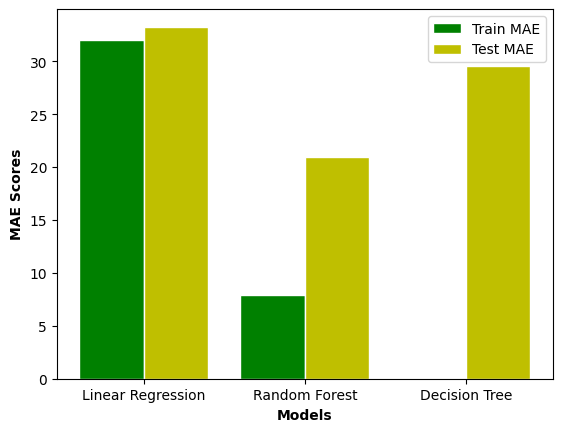

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of model names
models = ['Linear Regression', 'Random Forest', 'Decision Tree']

# Create a list of scores for each model
train_scores = [train_mae_lr, train_mae_rf, train_mae_clf]
test_scores = [test_mae_lr, test_mae_rf, test_mae_clf]

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))

# Set the width of the bars
barWidth = 0.4

# Create the bar plot for train and test MAE scores
plt.bar(r1, train_scores, color='g', width=barWidth, edgecolor='white', label='Train MAE')
plt.bar(r1+barWidth, test_scores, color='y', width=barWidth, edgecolor='white', label='Test MAE')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks(r1+barWidth/2, models)

# Set the y-axis label
plt.ylabel('MAE Scores', fontweight='bold')

# Add the legend
plt.legend()

# Show the plot
plt.show()


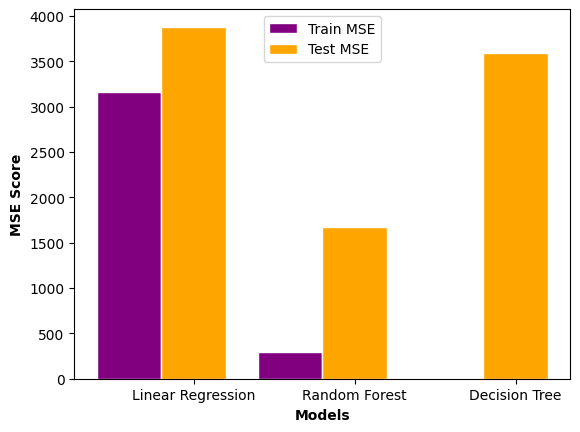

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of model names
models = ['Linear Regression', 'Random Forest', 'Decision Tree']

# Create a list of scores for each model
train_mse_scores = [train_mse_lr, train_mse_rf, train_mse_clf]
test_mse_scores = [test_mse_lr, test_mse_rf, test_mse_clf]

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))

# Set the width of the bars
barWidth = 0.4

# Create the bar plot for train MSE scores
plt.bar(r1, train_mse_scores, color='purple', width=barWidth, edgecolor='white', label='Train MSE')

# Create the bar plot for test MSE scores
plt.bar(r1 + barWidth, test_mse_scores, color='orange', width=barWidth, edgecolor='white', label='Test MSE')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)

# Set the y-axis label
plt.ylabel('MSE Score', fontweight='bold')

# Add the legend
plt.legend()

# Show the plot
plt.show()


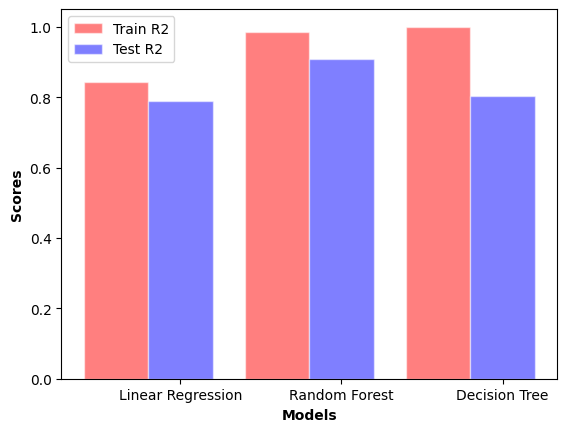

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of model names
models = ['Linear Regression', 'Random Forest', 'Decision Tree']

# Create a list of scores for each model
train_scores = [train_r2_lr, train_r2_rf, train_r2_clf]
test_scores = [test_r2_lr, test_r2_rf, test_r2_clf]

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))

# Set the width of the bars
barWidth = 0.4

# Create the bar plot for train and test R2 scores
plt.bar(r1, train_scores, color='red', width=barWidth, edgecolor='white', label='Train R2', alpha=0.5)
plt.bar(r1 + barWidth, test_scores, color='blue', width=barWidth, edgecolor='white', label='Test R2', alpha=0.5)

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)

# Set the y-axis label
plt.ylabel('Scores', fontweight='bold')

# Add the legend
plt.legend()

# Show the plot
plt.show()


**Linear Regression seems to be working best**


**Model Deployement**

In [74]:
import pickle
pickle_out = open('lr.pkl','wb')
pickle.dump(lr,pickle_out)
pickle_out.close()

**Visualizations**

**Actual VS Predicted AQI**

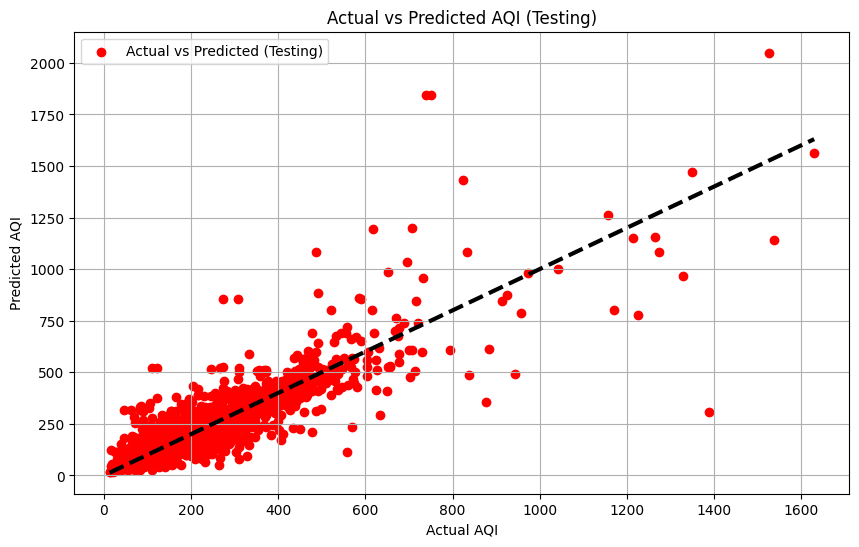

In [72]:
import matplotlib.pyplot as plt
# Create scatter plot for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='red', label='Actual vs Predicted (Testing)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3) # Plotting the diagonal line
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI (Testing)')
plt.legend()
plt.grid(True)
plt.show()

**Residual Plot**

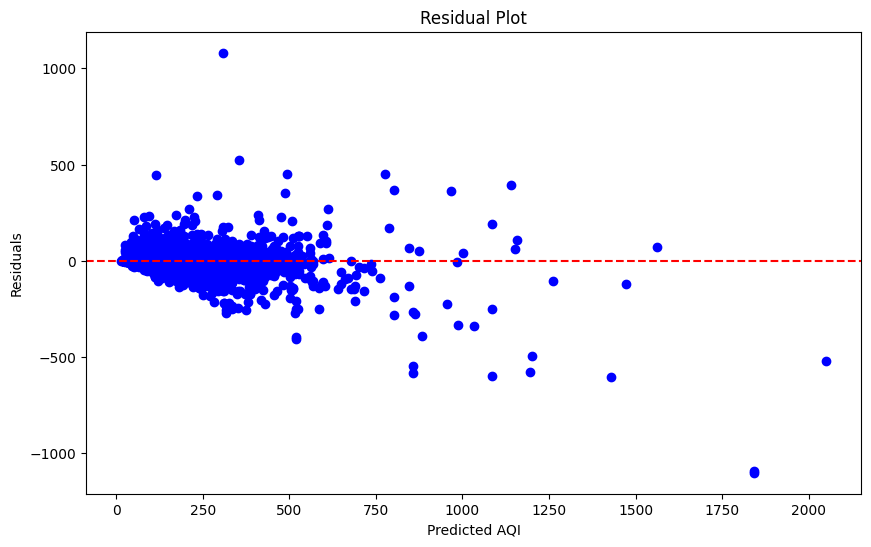

In [76]:
# Calculate residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


**Plot scatter plots for each feature vs. AQI**

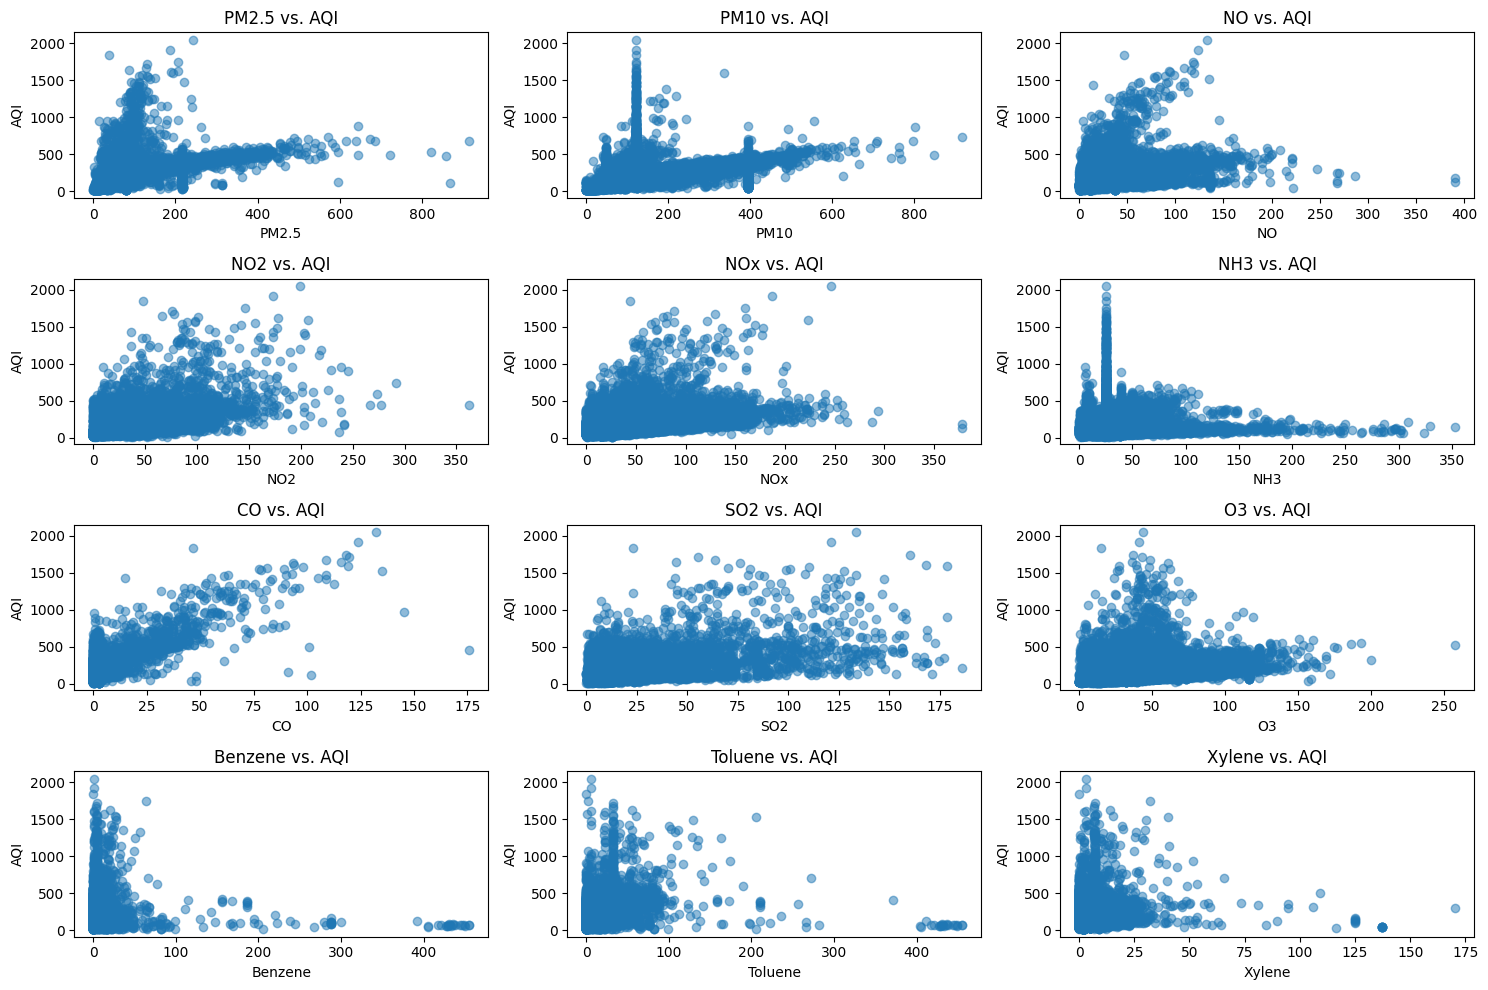

In [77]:
# Plot scatter plots for each feature vs. AQI
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(df[feature], df['AQI'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('AQI')
    plt.title(f'{feature} vs. AQI')
plt.tight_layout()
plt.show()
